# Introduction

This notebook presents the steps involved in data pre-processing which are applied on the Titanic dataset. I have also managed to work on multiple models and finally choose the one that maximizes efficieny.

We begin by importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

%matplotlib inline

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

Now we get the data

In [2]:
test_df = pd.read_csv('C:/Users/rmc/Desktop/Datasets/Titanic/test.csv')
train_df = pd.read_csv('C:/Users/rmc/Desktop/Datasets/Titanic/train.csv')

Next, we perform the data exploration and then infer how to approach the dataset.

# Data Exploration

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Here we can observe that the training set has 891 examples in total and 12 features. One of the 12 features is 'Survived' which is our target variable. Thus, we have 11 features to work with.

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the table above we can infer the following:
    - There are missing(NAN) values in the datasets
    - The features are spread cross a wide range
    - We need to focus on converting the feature values in the numberic form

In [6]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = (train_df.isnull().sum() / train_df.isnull().count()) * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis = 1, keys = ['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with 'Age' features 177 missing values. The 'Cabin' feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [7]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

Above we can see the 11 features + the target variable (survived). What features could contribute to a high survival rate? To me it would make sense if everything except 'PassengerId', 'Ticket' and 'Name' would be correlated with a high survival rate. Let's plot them all against the target-variable:

### We plot all the features against the target variable

### 1. Age and Sex:

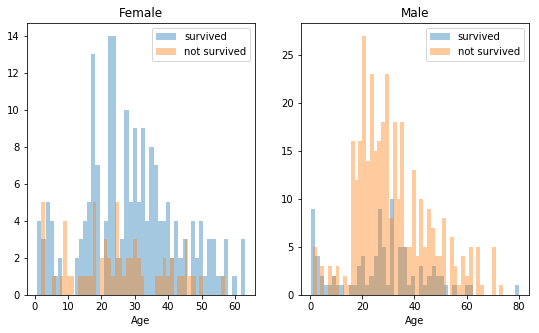

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

women = train_df[train_df['Sex'] == 'female']
men = train_df[train_df['Sex'] == 'male']

ax = sns.distplot(women[women['Survived'] == 1].Age.dropna(), bins=50, label='survived', ax=axes[0], kde=False)
ax = sns.distplot(women[women['Survived'] == 0].Age.dropna(), bins=50, label='not survived', ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men['Survived'] == 1].Age.dropna(), bins=50, label='survived', ax=axes[1], kde=False)
ax = sns.distplot(men[men['Survived'] == 0].Age.dropna(), bins=50, label='not survived', ax=axes[1], kde=False)
ax.legend()
ax.set_title('Male')

You can also see that men have a high probability of survival when they are between 18 and 30 years old, which is also a little bit true for women but not hundret percent. For women the survival chances are higher between 14 and 40.For men the probability of survival is very low between the age of 5 and 18, but that isn't true for women. Another thing to note is that infants have a higher probability of survival.Since there seem to be certain ages, which have increased odds of survival, I will create age groups later on.

### 2.  Embarked, Pclass and Sex:

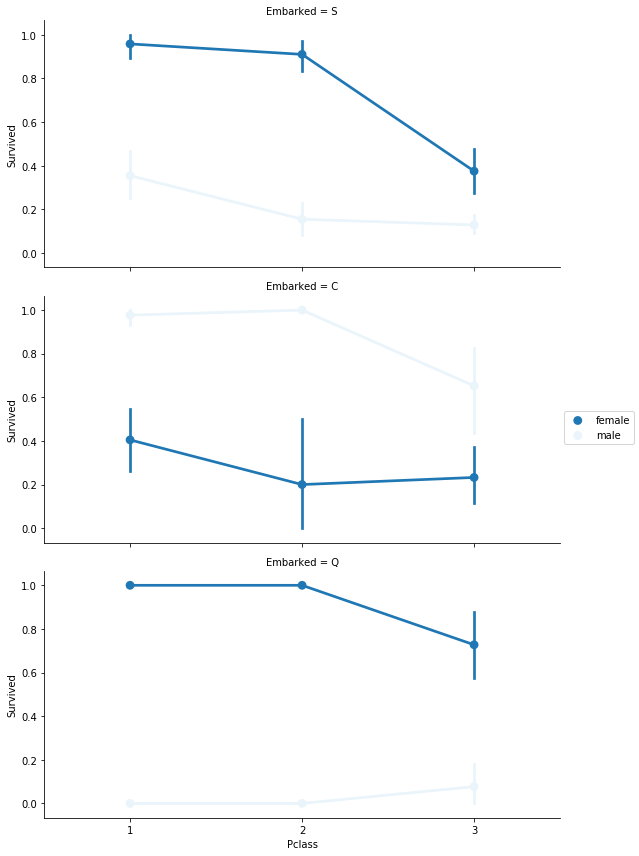

In [9]:
grid = sns.FacetGrid(train_df, row='Embarked', size=4, aspect=2)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
grid.add_legend()

From the plot above, we can infer that the Embarked feature is correlated with Survived. Pclass is also correlated with Survived. Hence, we will plot the correlation of Pclass alone in the following section.

### 3. Pclass:

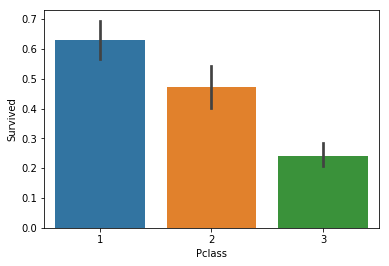

In [10]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

It is clear from the graph above that the passenger class contributed towrads the survival rate: better the class, better the survival rate.

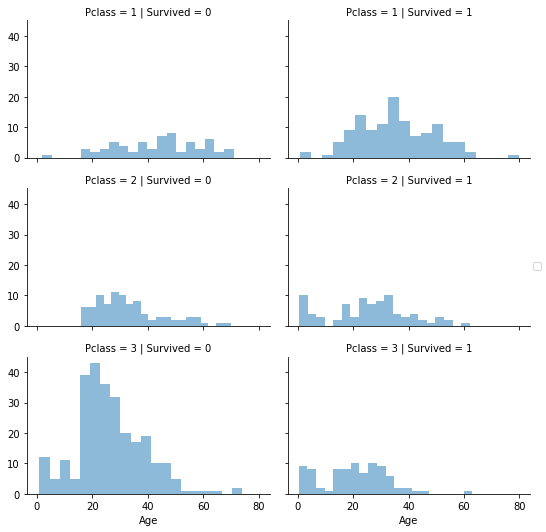

In [11]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.5, aspect=1.5)
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend()

The graph above confirms out assumption in regards to the Pclass feature.

### 4. SibSp and Parch:

We will combine the SibSp and Parch features into a new feature called 'relatives'. We will also create another feature 'alonne' for a person who did not have any relatives on the ship.

In [12]:
data = [train_df, test_df]

In [13]:
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset['alone'] = 0
    dataset.loc[dataset['relatives'] == 1, 'alone'] = 0

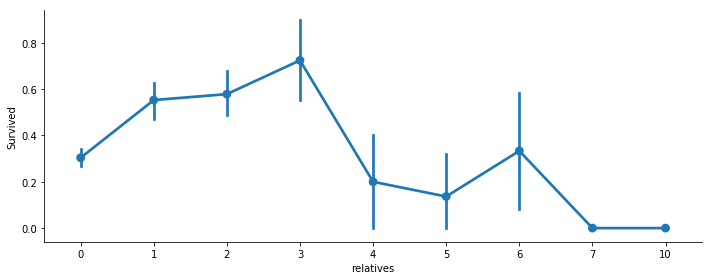

In [14]:
axes = sns.factorplot('relatives', 'Survived', data=train_df, aspect = 2.5)

# Data Preprocessing

We drop the PassengerId feature from the training set but not from the testing set since we need it during submission.

In [15]:
train_df = train_df.drop(['PassengerId'], axis=1)

## 1. Missing Data

We have to deal with the missing values for Cabin which has 687 missing values, Embarked which has 2 missing values and Age which has 177 missing values.

### Cabin:

In [16]:
import re
deck = {'U': 1, 'A': 2, 'B': 3, 'C': 4, 'D': 5, 'E': 6, 'F': 7, 'G': 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'][dataset.Cabin.isnull()] = 'U0'
    dataset['Deck'] = dataset['Cabin'].map(lambda x:re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

C:\Users\rmc\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

### Age:

In [18]:
data = [train_df, test_df]

for dataset in data:
    mean = dataset['Age'].mean()
    std = dataset['Age'].std()
    is_null = dataset['Age'].isnull().sum()
    
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    
    age_slice = dataset['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset['Age'] = age_slice
    dataset['Age'] = train_df['Age'].astype(int)

In [19]:
train_df["Age"].isnull().sum()

0

### Embarked:

Since the Embarked feature has only 2 missing values, we will fill it with the most common one.

In [20]:
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [21]:
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

## 2. Converting Features:

In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null int32
SibSp        891 non-null int64
Parch        891 non-null int64
Ticket       891 non-null object
Fare         891 non-null float64
Embarked     891 non-null object
relatives    891 non-null int64
alone        891 non-null int64
Deck         891 non-null int32
dtypes: float64(1), int32(2), int64(6), object(4)
memory usage: 83.6+ KB


From the above information we can assert that we still have to deal with 5 features. Fare, a float and Name, Sex, Ticket & Embarked which are categorical values.

### Fare:

In [23]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

### Name:

In [24]:
data = [train_df, test_df]

In [25]:
titles = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

for dataset in data:
    dataset['Title'] = dataset.Name.str.extract(' ([a-zA-Z]+)\.', expand=False)
    
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 
                                                 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
    dataset['Title'] = dataset['Title'].map(titles)
    
    dataset['Title'] = dataset['Title'].fillna(0)

In [26]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)


### Sex:

We need to convert the feature 'Sex' into a numeric representation.

In [27]:
genders = {'male': 0, 'female': 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

### Ticket:

In [28]:
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories.. So we will drop it from the dataset.

In [29]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)


### Embarked:

In [30]:
ports = {'S': 0, 'C': 1, 'Q': 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

## 3. Creating Categories:

We will focus on the creation of categories within the respective features.

### Age:

We will categorize different ages into groups and represent them numerically.

In [31]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 22), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 33), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 44), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 44) & (dataset['Age'] <= 55), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 55) & (dataset['Age'] <= 66), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

In [32]:
train_df['Age'].value_counts()

2    294
1    208
3    206
4     76
0     68
5     32
6      7
Name: Age, dtype: int64

### Fare:

We need to categorize the fares as well. But, this is rather tricky since the majority of the fares are sold for a lesser price. Tus, to ensure even ditribution of values in the feature 'Fare' we will use the pd.qcut() function which will assist us in segregating the fares in an orderly fashion and will also ensure even ditribution.

In [33]:
train_df.head(15)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title
0,0,3,0,1,1,0,7,0,1,0,1,1
1,1,1,1,3,1,0,71,1,1,0,4,3
2,1,3,1,2,0,0,7,0,0,0,1,2
3,1,1,1,3,1,0,53,0,1,0,4,3
4,0,3,0,3,0,0,8,0,0,0,1,1
5,0,3,0,1,0,0,8,2,0,0,1,1
6,0,1,0,4,0,0,51,0,0,0,6,1
7,0,3,0,0,3,1,21,0,4,0,1,4
8,1,3,1,2,0,2,11,0,2,0,1,3
9,1,2,1,1,1,0,30,1,1,0,1,3


In [34]:
train_df['Fare'] = train_df['Fare'].astype(int)
train_df['FareRange'] = pd.qcut(train_df['Fare'], 6)
train_df[['FareRange', 'Survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

,FareRange,Survived
0,"(-0.001, 7.0]",0.215768
1,"(7.0, 8.0]",0.142857
2,"(8.0, 14.0]",0.356164
3,"(14.0, 26.0]",0.484848
4,"(26.0, 52.0]",0.382114
5,"(52.0, 512.0]",0.691781


In [35]:
train_df = train_df.drop(['FareRange'], axis=1)
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

# Creating New Features

We are now going to add two new features to our dataset. The features will be labelled Age_Class and Fare_Per_Person

### Age Times Class:

In [36]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age'] * dataset['Pclass']

In [37]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title,Age_Class
0,0,3,0,1,1,0,0,0,1,0,1,1,3
1,1,1,1,3,1,0,3,1,1,0,4,3,3
2,1,3,1,2,0,0,0,0,0,0,1,2,6
3,1,1,1,3,1,0,3,0,1,0,4,3,3
4,0,3,0,3,0,0,1,0,0,0,1,1,9


### Fare per Person:

In [38]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare'] / (dataset['relatives'] + 1)

In [39]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,0,1,1,0,0,0,1,0,1,1,3,0.0
1,1,1,1,3,1,0,3,1,1,0,4,3,3,1.5
2,1,3,1,2,0,0,0,0,0,0,1,2,6,0.0
3,1,1,1,3,1,0,3,0,1,0,4,3,3,1.5
4,0,3,0,3,0,0,1,0,0,0,1,1,9,1.0


# Building Models

Buliding models is an essential part of our learning process. Since the task at hand is Supervised Learning plus a Classifiation and Regressin problem we will choose the following models:
    - Logistic Regression
    - Support Vector Machines
    - k-Nearest Neighbors (KNN)
    - Gaussian Naive Bayes Classifier
    - Perceptron
    - Linear SVC
    - Stochastic Gradient Descent
    - Decision Trees
    - Random Forst Classifier
    
Thus we begin...

In [40]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 13), (891,), (418, 13))

### 1. Logistic Regression:

In [41]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.590000000000003

We can use Logistic Regression to validate our assumptions and decisions for feature creating and completing goals. This can be done by calculating the coefficient of the features in the decision function.Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).

   - Sex is highest positivie coefficient, implying as the Sex value increases (male: 0 to female: 1), the probability of Survived=1 increases the most.
   - Inversely as Pclass increases, probability of Survived=1 decreases the most.
   - This way Age*Class is a good artificial feature to model as it has second highest negative correlation with Survived.
   - So is Title as second highest positive correlation.

In [42]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.174222
10,Title,0.493029
5,Fare,0.383613
6,Embarked,0.244198
9,Deck,0.189577
8,alone,0.000000
11,Age_Class,-0.011146
4,Parch,-0.043008
12,Fare_Per_Person,-0.212640
3,SibSp,-0.247475


### 2. Support Vector Machines:

SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier.

In [43]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

85.629999999999995

### 3. k-Nearest Neigbhors:

In KNN, a sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.530000000000001

### 4. Naive Bayes:

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

In [45]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.790000000000006

### 5. Perceptron:

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time.

In [46]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\rmc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


76.769999999999996

### 6. Linear SVC:

In [47]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.590000000000003

### 7. Stochastic Gradient Descent:

In [48]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\Users\rmc\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


74.969999999999999

### 8. Decision Tree:

Tree models are created wherein the target variable can take a finite set of values(called classification trees) in these tree structures. The leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees are used where the target variable can take continuous values (typically real numbers)  called regression trees.

In [49]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

91.810000000000002

### 9. Random Forest Classifiers:

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.

In [50]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

91.810000000000002

## Model Evaluation:

We can now rank our evaluation of all the models to choose the best one for our problem. While both Decision Tree and Random Forest score the same, we choose to use Random Forest since Decision trees end up overfitting the training set.

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,91.81
8,Decision Tree,91.81
1,KNN,86.53
0,Support Vector Machines,85.63
2,Logistic Regression,81.59
7,Linear SVC,81.59
4,Naive Bayes,78.79
5,Perceptron,76.77
6,Stochastic Gradient Decent,74.97


# Submission

In [52]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('C:/Users/rmc/Desktop/Datasets/Titanic/Output/submission.csv', index=False)